In [33]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [34]:
train_data = pd.read_csv('train.csv', index_col='PassengerId')
test_data = pd.read_csv('test.csv', index_col='PassengerId')


In [35]:
### Check data

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

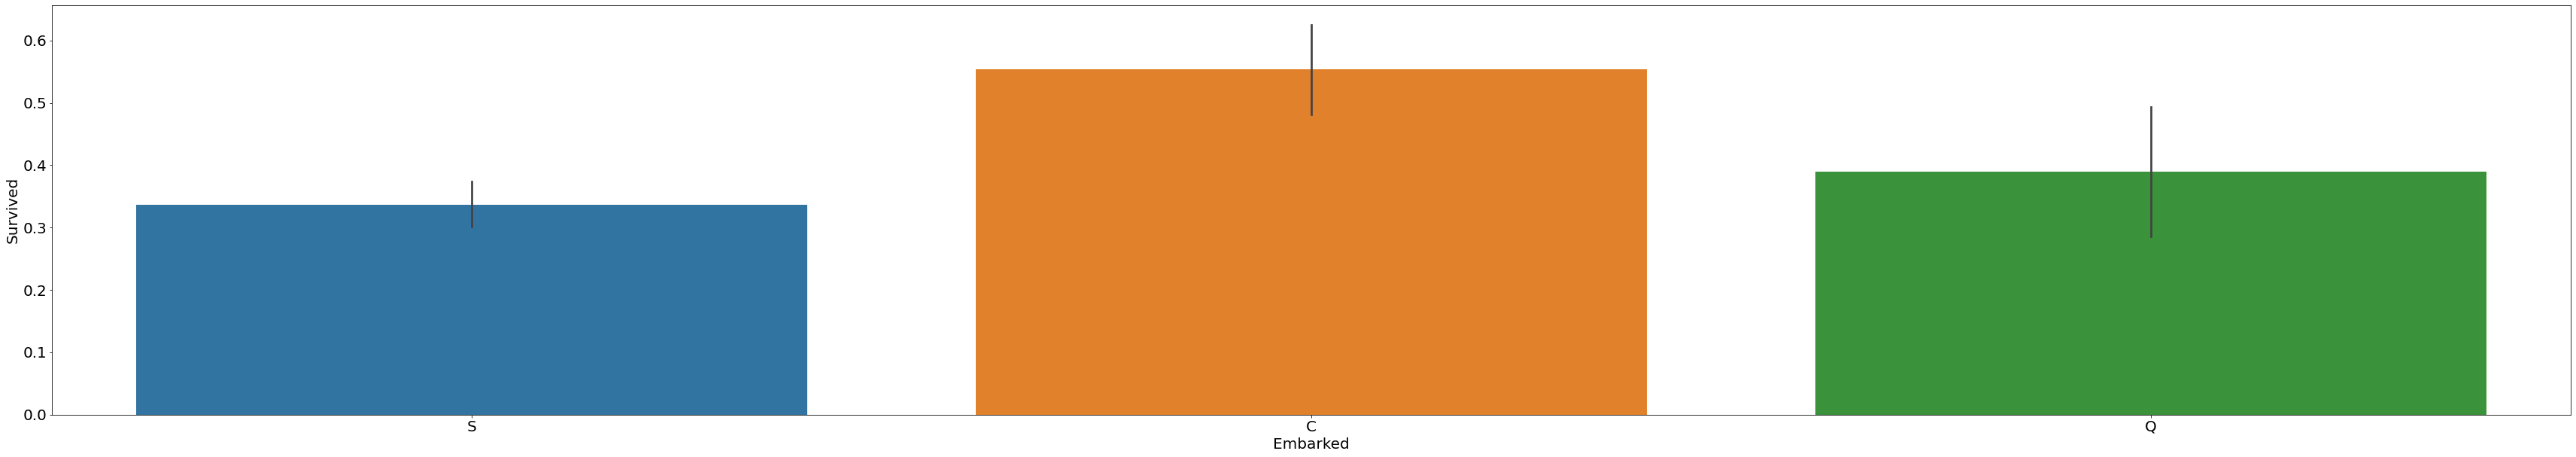

In [36]:
# ## Plotting Area
plt.rc('font', size=20)
plt.figure(figsize=(60, 10))
sns.barplot(x=train_data.Embarked , y=train_data.Survived)

In [37]:
train_data['PClass_One'] = False
train_data['PClass_Two'] = False
train_data['PClass_Three'] = False

test_data['PClass_One'] = False
test_data['PClass_Two'] = False
test_data['PClass_Three'] = False

def RoomSetting(pf):
    if pf.Pclass == 1:
        pf.PClass_One = True
    elif pf.Pclass == 2:
        pf.PClass_Two = True
    else: 
        pf.PClass_Three = True
    return pf

train_data = train_data.apply(RoomSetting, axis=1)
test_data = test_data.apply(RoomSetting, axis=1)



In [38]:
train_data.replace('female', True, inplace=True)
train_data.replace('male', False, inplace=True)

test_data.replace('female', True, inplace=True)
test_data.replace('male', False, inplace=True)

train_data.replace('S', 0, inplace=True)
train_data.replace('Q', 1, inplace=True)
train_data.replace('C', 2, inplace=True)


test_data.replace('S', 0, inplace=True)
test_data.replace('Q', 1, inplace=True)
test_data.replace('C', 2, inplace=True)


In [39]:
features = ['Sex', 'PClass_One', 'PClass_Two', 'PClass_Three', 'Embarked']

train_X = train_data[features]
train_y = train_data.Survived

test_X = test_data[features]

In [40]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200, min_samples_leaf=2)
classifier.fit(train_X, train_y)

prediction = classifier.predict(test_X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
output = pd.DataFrame({
    'PassengerId': test_data.index,
    'Survived': prediction,
})
output.to_csv('submission.csv', index=False)

